In [74]:
import networkx as nx

from factorio_design_compiler.fdc_utils import bp_string_to_json
import numpy as np
import pandas as pd

In [2]:
basic_belts = bp_string_to_json('0eJydldFugyAUht/lXNMGUGvxcq+xNI22ZCFRNEiXGeO7D+fWLDmSerxTge+cfPLDCFX90J0z1kMxgrm1tofifYTefNiynr/5odNQgPG6AQa2bOY370rbd63zh0rXHiYGxt71FxRiujDQ1htv9EJaX8Gga/swqbVzjbDwkBwzBkN4kMcs8O7G6dsyLn+Jw9U+mkq7uQrbDhZRcIrAkgDmUe4JcRMCV0a5HHFTioinYf7acEYByygYGz5RwJzQcb7n1yEuVnzeo1i87lftMYy4WLDge8KBwHgPC0rq+HYRghK6aL8rIiih++t3y+FDCZ0gcCmZi0duBUzJXPyQWNkRlMwlMRM4coKSuWjkVnaEmm+nn5us+HfxMfjUrl/knUWaK5mnUqlECQZ1GaqG2W/P2dP0DWvKW7E=')

In [3]:
# Get the actual design layout
basic_belts_entities = basic_belts.get('blueprint').get('entities')
basic_belts_entities

[{'name': 'transport-belt',
  'position': {'x': -3.5, 'y': -2.5},
  'direction': 2,
  'entity_number': 1},
 {'name': 'transport-belt',
  'position': {'x': -1.5, 'y': -2.5},
  'direction': 4,
  'entity_number': 2},
 {'name': 'transport-belt',
  'position': {'x': 0.5, 'y': -2.5},
  'direction': 6,
  'entity_number': 3},
 {'name': 'transport-belt',
  'position': {'x': 2.5, 'y': -2.5},
  'direction': 0,
  'entity_number': 4},
 {'name': 'transport-belt',
  'position': {'x': -3.5, 'y': -0.5},
  'direction': 2,
  'entity_number': 5},
 {'name': 'transport-belt',
  'position': {'x': -2.5, 'y': -0.5},
  'direction': 4,
  'entity_number': 6},
 {'name': 'transport-belt',
  'position': {'x': -0.5, 'y': -0.5},
  'direction': 2,
  'entity_number': 7},
 {'name': 'transport-belt',
  'position': {'x': 0.5, 'y': -0.5},
  'direction': 0,
  'entity_number': 8},
 {'name': 'transport-belt',
  'position': {'x': -3.5, 'y': 1.5},
  'direction': 2,
  'entity_number': 9},
 {'name': 'transport-belt',
  'position':

In [168]:
basic_belts_df = pd.DataFrame.from_dict(basic_belts_entities)
basic_belts_df = basic_belts_df[basic_belts_df.name == 'transport-belt']
basic_belts_df.drop('entity_number', axis=1, inplace=True, errors='ignore')

def get_position_int_x(d: dict) -> int:
    x_raw_float = d.get('x')
    x_int = int(x_raw_float * 2)
    return x_int

def get_position_int_y(d: dict) -> int:
    y_raw_float = d.get('y')
    y_int = int(y_raw_float * 2)
    return y_int

basic_belts_df['x'] = basic_belts_df.position.map(get_position_int_x)
basic_belts_df['y'] = basic_belts_df.position.map(get_position_int_y)
basic_belts_df.drop('position', axis=1, inplace=True, errors='ignore')
basic_belts_df['direction_we'] = ((basic_belts_df.direction // 2) % 2).astype(int)
basic_belts_df['direction_ns'] = ((basic_belts_df.direction // 2 + 1) % 2).astype(int)
basic_belts_df['direction_ne'] = ((basic_belts_df.direction // 2) < 2).astype(int)
basic_belts_df['x_snap'] = basic_belts_df.x // 2 * 2
basic_belts_df['y_snap'] = basic_belts_df.y // 2 * 2
basic_belts_df['x_with_side'] = list(zip(
    basic_belts_df.x - basic_belts_df.direction_ns,
    basic_belts_df.x
))
basic_belts_df['y_with_side'] = list(zip(
    basic_belts_df.y - basic_belts_df.direction_we,
    basic_belts_df.y
))
basic_belts_df = basic_belts_df.explode(column=['x_with_side', 'y_with_side'])
basic_belts_df['x_with_side'] -= basic_belts_df.direction_we * (1 - basic_belts_df.direction_ne)
basic_belts_df['y_with_side'] -= basic_belts_df.direction_ns * (basic_belts_df.direction_ne)
basic_belts_df.name = basic_belts_df.name + '-side'
basic_belts_df['x_delta'] = basic_belts_df.direction_we * 2 * (basic_belts_df.direction_ne * 2 - 1)
basic_belts_df['y_delta'] = basic_belts_df.direction_ns * 2 * (1 - basic_belts_df.direction_ne * 2)
basic_belts_df

,name,direction,x,y,direction_we,direction_ns,direction_ne,x_snap,y_snap,x_with_side,y_with_side,x_delta,y_delta
0,transport-belt-side,2,-7,-5,1,0,1,-8,-6,-7,-6,2,0
0,transport-belt-side,2,-7,-5,1,0,1,-8,-6,-7,-5,2,0
1,transport-belt-side,4,-3,-5,0,1,0,-4,-6,-4,-5,0,2
1,transport-belt-side,4,-3,-5,0,1,0,-4,-6,-3,-5,0,2
2,transport-belt-side,6,1,-5,1,0,0,0,-6,0,-6,-2,0
2,transport-belt-side,6,1,-5,1,0,0,0,-6,0,-5,-2,0
3,transport-belt-side,0,5,-5,0,1,1,4,-6,4,-6,0,-2
3,transport-belt-side,0,5,-5,0,1,1,4,-6,5,-6,0,-2
4,transport-belt-side,2,-7,-1,1,0,1,-8,-2,-7,-2,2,0
4,transport-belt-side,2,-7,-1,1,0,1,-8,-2,-7,-1,2,0


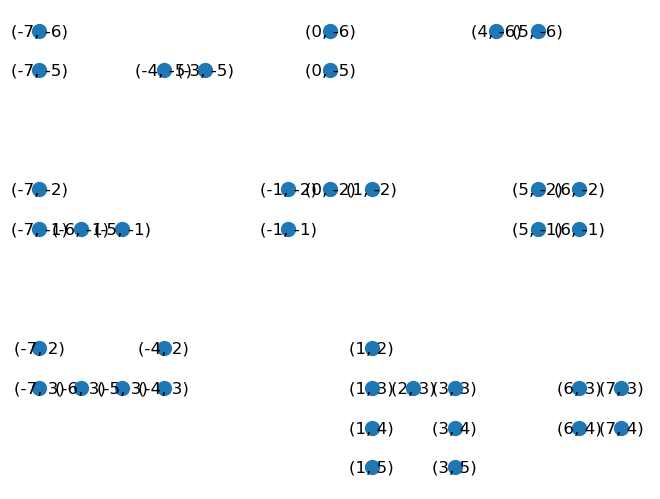

In [169]:
belts_graph = nx.DiGraph()
for i, row in basic_belts_df.iterrows():
    belts_graph.add_node(
        (row.x_with_side, row.y_with_side),
        entity_pos=(row.x, row.y),
        pos=(row.x_with_side, -row.y_with_side),
        delta=(row.x_delta, row.y_delta)
    )
pos = nx.get_node_attributes(belts_graph, 'pos')
# nx.draw(belts_graph)
nx.draw(belts_graph, pos=pos, node_size=100, with_labels=True)

In [170]:
x_pos = (3, 5)
x = belts_graph.nodes.get(x_pos)
behind = (x_pos[0] - x['delta'][0], x_pos[1] - x['delta'][1])
behind_node = belts_graph.nodes.get(behind)
behind_node

{'entity_pos': (1, 5), 'pos': (1, -5), 'delta': (2, 0)}